# Application: Image Compression

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import urllib3

In [3]:
from PIL import Image
import requests
from io import BytesIO

smiling = Image.open("isb.png")

In [4]:
isb = np.array(smiling)

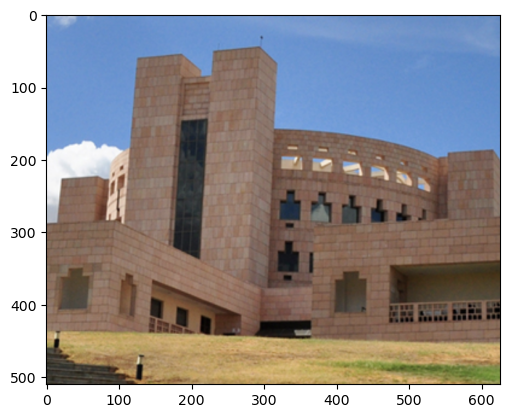

In [5]:
plt.imshow( isb );

In [6]:
isb.shape

(510, 626, 4)

In [7]:
grayscale = isb[:, :, :1]

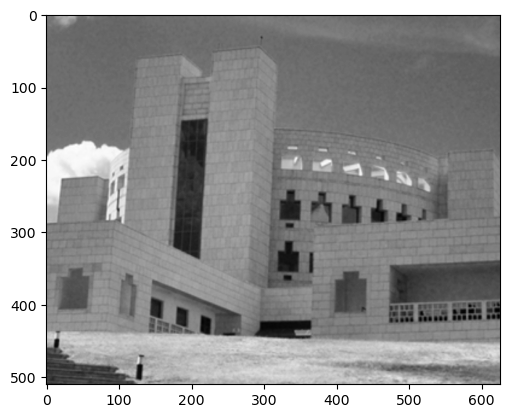

In [8]:
plt.imshow( grayscale, cmap='gray' );

In [9]:
grayscale.shape

(510, 626, 1)

### SVD of Image Matrix

In [10]:
U_vec, sigma, V_vec = np.linalg.svd(np.matrix(grayscale))

### Using the first vectors

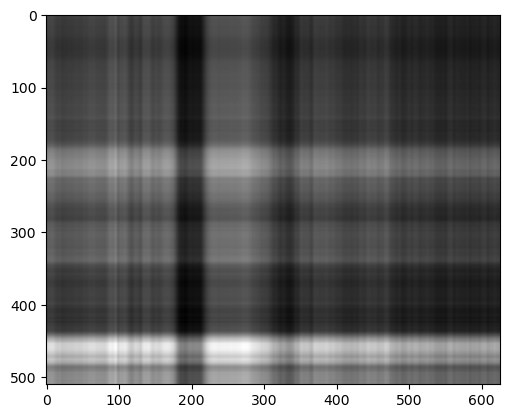

In [11]:
image_1_vec = U_vec[:, :1] @ np.diag(sigma[:1]) @ V_vec[:1, :]
plt.imshow(image_1_vec, cmap='gray');

### Using 10 vectors

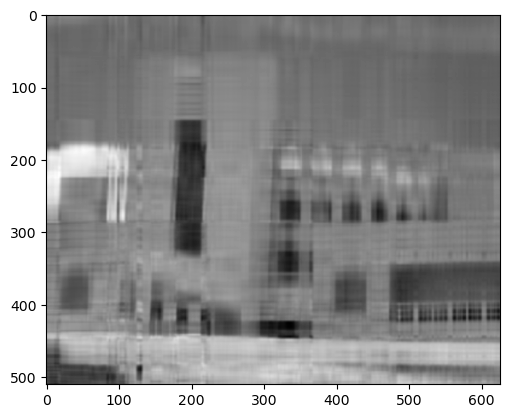

In [12]:
image_1_vec = U_vec[:, :10] @ np.diag(sigma[:10]) @ V_vec[:10, :]
plt.imshow(image_1_vec, cmap='gray');

### Using 50 vectors

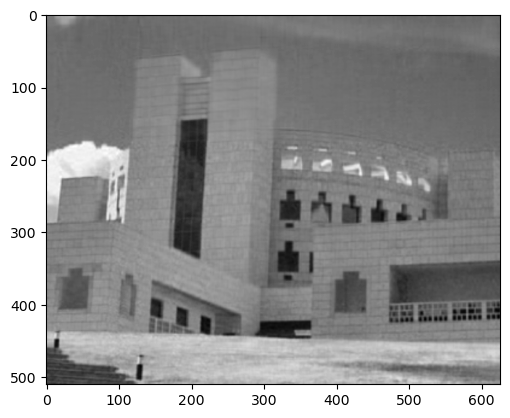

In [13]:
image_1_vec = U_vec[:, :50] @ np.diag(sigma[:50]) @ V_vec[:50, :]
plt.imshow(image_1_vec, cmap='gray');

In [14]:
sigma.shape

(510,)

### How many numbers?

In [15]:
U_vec[:, :50].shape

(510, 50)

In [16]:
U_vec[:, :50].shape[0] * U_vec[:, :50].shape[1]

25500

In [17]:
num_vals = 2 * (U_vec[:, :50].shape[0] * U_vec[:, :50].shape[1]) + sigma[:50].shape[0]

In [18]:
num_vals

51050

In [19]:
grayscale.shape[0] * grayscale.shape[1]

319260

In [20]:
num_vals / (grayscale.shape[0] * grayscale.shape[1])

0.15990102111131993

## How much information is explained and how much is lost?

In [21]:
total_variance = np.sum( sigma )

In [22]:
np.round(sigma, 2)[0:30]

array([72234.77, 10449.18,  6009.4 ,  5412.79,  5248.85,  3479.14,
        3165.31,  2853.19,  2540.59,  2349.32,  2062.42,  1924.16,
        1755.01,  1575.86,  1559.16,  1497.61,  1343.28,  1154.92,
        1143.02,  1072.93,  1037.08,   963.31,   913.84,   892.66,
         863.21,   796.03,   750.84,   733.62,   707.88,   700.28])

In [23]:
np.round(sigma, 2)[-30:]

array([2.22, 2.15, 2.09, 2.07, 2.02, 2.01, 1.99, 1.96, 1.93, 1.89, 1.82,
       1.8 , 1.76, 1.73, 1.68, 1.65, 1.6 , 1.58, 1.54, 1.54, 1.51, 1.44,
       1.43, 1.37, 1.35, 1.31, 1.27, 1.22, 1.17, 0.99])

In [24]:
var_explained = np.round([(eig_val/total_variance) for eig_val in sigma], 3)

In [25]:
var_explained_cumm = np.cumsum( var_explained )

In [26]:
var_explained_df = pd.DataFrame( {'component': range(1,275),
                              'variance': var_explained[0:274],
                              'var_cumsum': var_explained_cumm[0:274]} )

In [27]:
var_explained_df[0:10]

,component,variance,var_cumsum
0,1,0.427,0.427
1,2,0.062,0.489
2,3,0.036,0.525
3,4,0.032,0.557
4,5,0.031,0.588
5,6,0.021,0.609
6,7,0.019,0.628
7,8,0.017,0.645
8,9,0.015,0.660
9,10,0.014,0.674


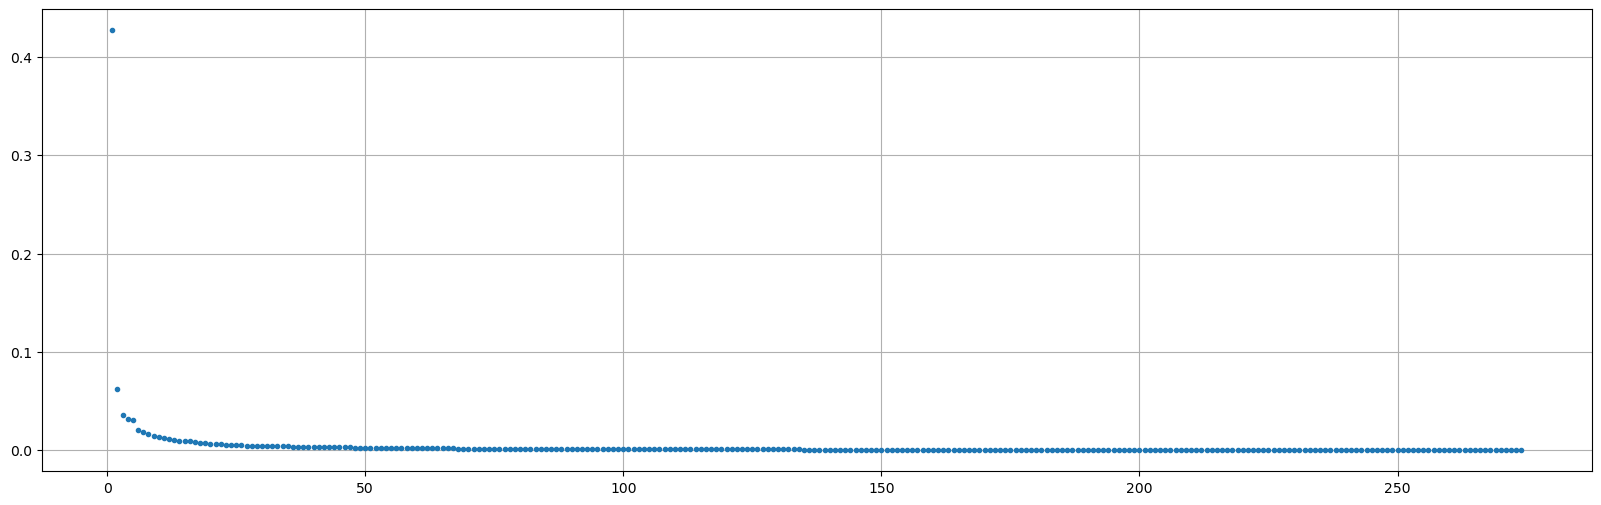

In [28]:
plt.figure(figsize = (20, 6))
plt.grid()
plt.plot(var_explained_df.component,
         var_explained_df.variance,
         '.');

In [29]:
var_explained_df[0:50]

,component,variance,var_cumsum
0,1,0.427,0.427
1,2,0.062,0.489
2,3,0.036,0.525
3,4,0.032,0.557
4,5,0.031,0.588
5,6,0.021,0.609
6,7,0.019,0.628
7,8,0.017,0.645
8,9,0.015,0.660
9,10,0.014,0.674


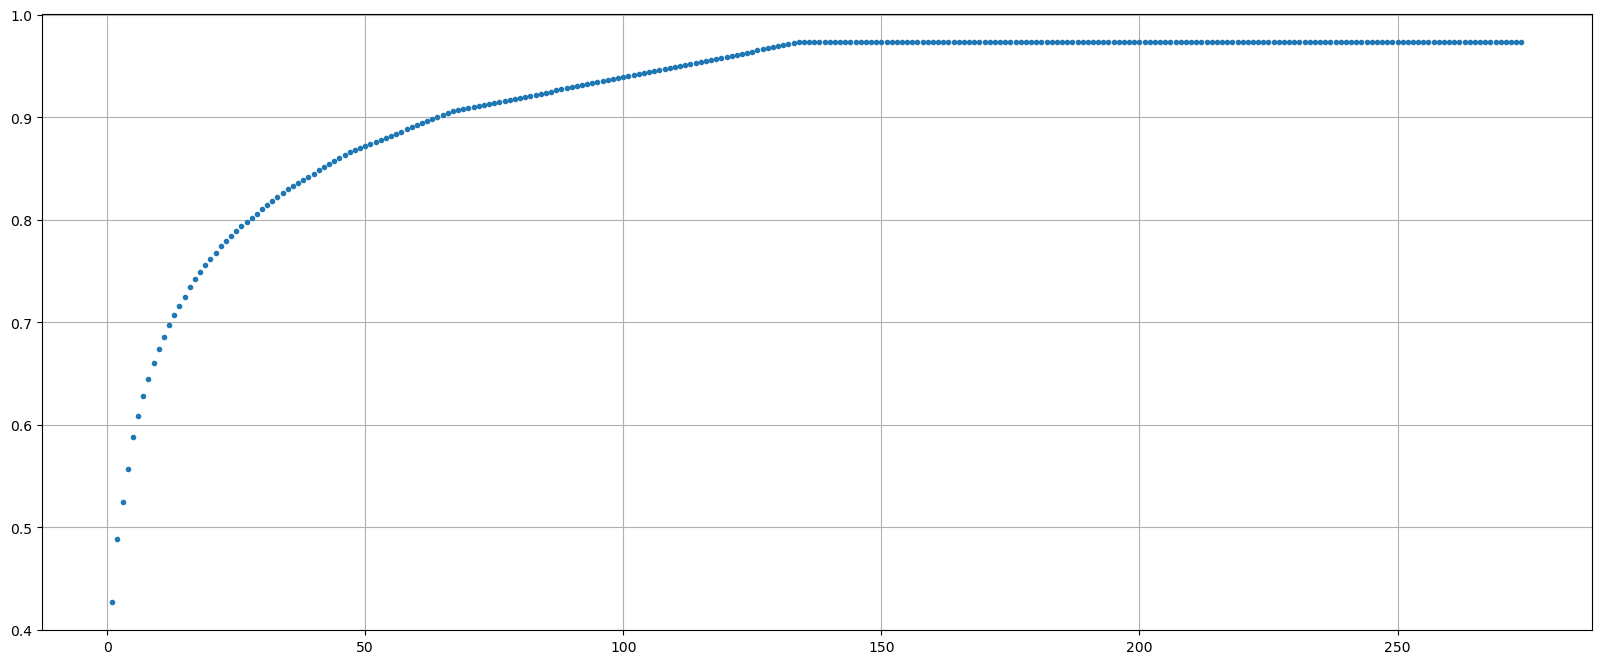

In [30]:
plt.figure(figsize = (20, 8))
plt.grid()
plt.plot(var_explained_df.component,
         var_explained_df.var_cumsum,
         '.');